# Chapter 6 : Understand Your Data With Visualization
#### machine learning algorithms에서 데이터를 이해하는 것이 핵심
#### 데이터를 자세히 알아보는 방법에서 가장 빠른 방법은 시각화
#### chapter 6은 panda를 사용하여 데이터를 시각화하는 방법을 정확하게 알아보기
## 6.1 Univariate Plots
#### 데이터의 각 속성을 독립적으로 이해하는 데 사용할 수 있는 세 가지 기술
#### 1.Histogram 2. Density Plots 3.Box and Whisker Plots
## 6.1.1 Histogram
#### Univariate Histograms
##### 히스토그램 : 측정값이 범위를 각 구간으로 나누어 도수 분포를 나타내는 그래프.
##### x축은 측정 값, y축은 도수

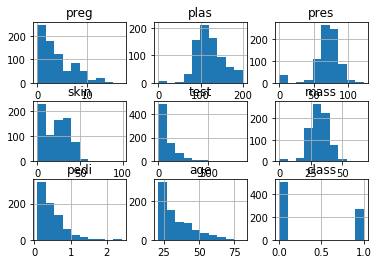

In [1]:
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(filename, names=names)
data.hist(bins=10) # data:DataFreame, grid:default true, xlabelsize,xrot,ylabelsize,yrot,ax:default none, ... bins:defualt 10 
                    # bin = 몇 개의 구간을 설정할 지 / bin이 올라갈 수록 한 눈에 보기 힘들어지지만 더욱 정확
pyplot.show()

## 6.1.2 Density Plots
#### Univariate Density Plots
##### histogram을 곡석형으로 나타낸 것

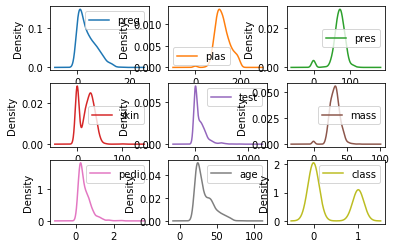

In [2]:
from matplotlib import pyplot #data 768x9
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey= False) #그래프 종류 : density, 각 열마다 그래프화해준다, 3x3으로, xlabel,ylabel axis를 자동 설정
pyplot.show() # y축 상대도수/계급의 크기, 시그마 계급의크기*상대도수/계급의크기=1

## 6.1.3 
#### Box and Whisker Plots
##### 박스는 Q3, Q2, Q1으로 이루어져 있으며 
##### Upper Extreme : Q3+1.5IQR 이상 가장 큰 값 / Low Extreme : Q1-1.5IQR 이하 가장 작은 값
##### Outliers은 점으로 표시되며, Upper Ex,Lower Ex 밖의 값

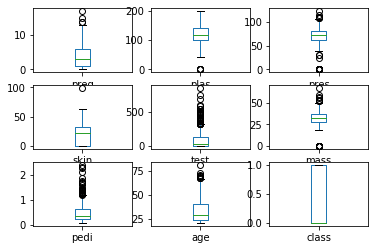

In [3]:
from matplotlib import pyplot
from pandas import read_csv
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

## 6.2 Multivariate Plots
#### 데이터 집합의 여러 변수 간의 상관도를 보여주는 두 그래프에 대해
#### 1. Correlation Matrix Plot 2. Scatter Plot Matrix

## 6.2.1 Correlation Matrix Plot
#### Correlation Matrix Plot

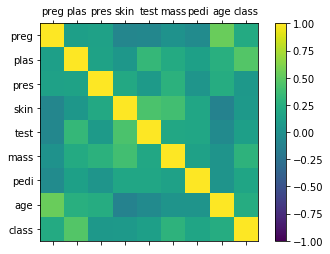

In [4]:
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1) #1x1 그리드 생성, 첫번째 subplot
cax = ax.matshow(correlations, vmin=-1, vmax=1) # 2d 행렬또는 배열의 값을 색상코드 이미지로 플로팅
fig.colorbar(cax) #왼쪽 colorbar생성
ticks = numpy.arange(0,9,1) #0부터 9개의 숫자들을 1의 간격으로 array의 형태로 반환
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show() # plas(경구 포도당 내성 검사에서 2시간 뒤 혈장 포도당 수치, mass 몸무게/키 제곱수치)

#### Correlation Matrix Plot (generic)
##### 위의 표는 축을 따라 속성의 이름과 눈금의 수를 지정한다는 점이 일반적이지 않음.
##### 아래는 그것을 지정하지 않음으로써 일반적

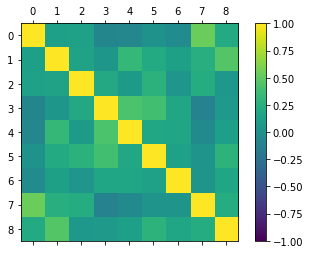

In [5]:
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

## 6.2.2 Scatter Plot Matrix
##### 두 변수 사이의 관계를 2차원의 점으로 표시
##### 변수 간의 구조화된 관계를 찾는 데 유용
#### Scatterplot Matrix

In [6]:
from matplotlib import pyplot
from pandas import read_csv
from pandas.plott.ing import scatter_matrix
filename = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(filename, names=names)
scatter_matrix(data)
pyplot.show()

ModuleNotFoundError: No module named 'pandas.plott'

# Chapter 7 : Prepare Your Data For Machine Learning
#### scikit-learn을 사용하여 파이썬에서 머신 러닝을 위한 데이터를 준비하는 방법
#### 1. Rescale data 2. Standardize data 3. Normalize data 4. Binarize data

## 7.3 Rescale Data
#### 많은 머신 러닝 알고리즘이 동일한 척도를 가지도록 속성 크기를 조정함으로써 이점
#### 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버-언더플로우를 방지
#### 종종 정규화라고 불리며, 종종 0과 1사이의 범위로도 축소된다.
#### MinMaxScaler 클래스를 사용하여 scikit-learn을 사용하여 데이터 스케일을 변경할 수 있다.
#### Rescale data (between 0 and 1)
##### 최대/최소값을 조정하여 스케일링
##### 이상치가 있는 경우, 이상치가 변환되면 값이 매우 좁음 범위로 압축될 수 있다

In [7]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values #dataframe의 값들만 array에 저장
# separate array into input and output components
X = array[:,0:8] #0부터 8까지 
Y = array[:,8] #8번째 (class)
scaler = MinMaxScaler(feature_range=(0, 1)) # 최소,최대 0~1 범위
rescaledX = scaler.fit_transform(X) # X data를 0~1범위로 변경, 각 행별로 이루어진다. (x-xmin)/(xmax-xmin)
#print(scaler.data_min_, scaler.data_max_)
set_printoptions(precision=3) #소숫점 셋째짜리 까지
print(rescaledX)

[[0.353 0.744 0.59  ... 0.501 0.234 0.483]
 [0.059 0.427 0.541 ... 0.396 0.117 0.167]
 [0.471 0.92  0.525 ... 0.347 0.254 0.183]
 ...
 [0.294 0.608 0.59  ... 0.39  0.071 0.15 ]
 [0.059 0.633 0.492 ... 0.449 0.116 0.433]
 [0.059 0.467 0.574 ... 0.453 0.101 0.033]]


## 7.4 Standardize Data
#### Standardize data (0 mean, 1 stdev)
##### 평균과 표준편차 사용, 기본 스케일 >> 이상치(신뢰도가 낮은 값)이 있으면, 평균과 표준편차에 영향을 미침.

In [11]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values 
# separate array into input and output components
X = array[:,0:8] 
Y = array[:,8] 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X) # (x-u)/var(x) >> 평균 0 분산 1이 됨
#description = dataframe.describe() 
#print(description)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## 7.5 Normalize Data
#### Normalize data (length of 1)
##### 유클리디안 거리를 사용, 지름이 1인 원, 데이터의 방향이 중요할 때 사용

In [9]:
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


## 7.6 Binarize Data (Make Binary)
#### 선명한 값으로 만들 고 싶은 확률이 있을 때 유용

In [10]:
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X) #0이 아니면 1로 표현 0.0보다 작거나 같으면 0, 아니면 1
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]
